In [ ]:
!pip install dill

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
import dill

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/dataset/Admission_Predict_Ver1.1.csv').set_index('Serial No.')
data=data.rename(columns={'Chance of Admit ':'Chance of Admit','LOR ':'LOR'})

In [ ]:
data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
496,332,108,5,4.5,4.0,9.02,1,0.87
497,337,117,5,5.0,5.0,9.87,1,0.96
498,330,120,5,4.5,5.0,9.56,1,0.93


In [ ]:
print('the dataset has {} rows.'.format(len(data)))
print('the dataset has {} columns.'.format(data.columns))

the dataset has 500 rows.
the dataset has Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object') columns.


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 1 to 500
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 35.2 KB
None


In [ ]:
data.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [ ]:
data.isnull().any()

GRE Score            False
TOEFL Score          False
University Rating    False
SOP                  False
LOR                  False
CGPA                 False
Research             False
Chance of Admit      False
dtype: bool

Checking the corelation between all the features


<Axes: >

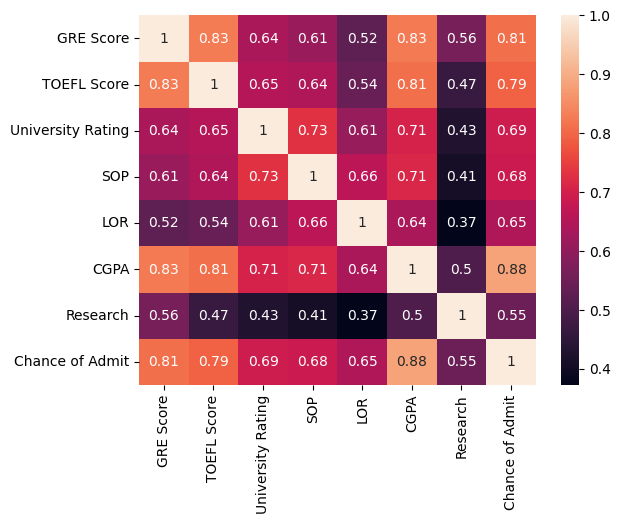

In [ ]:
sns.heatmap(data.corr(), annot=True)

Splitting the data into traing and testing set

In [ ]:
X_train, X_test, y_train, y_tes = train_test_split(data.drop(columns='Chance of Admit'), data['Chance of Admit'], test_size=0.2)

In [ ]:
X_train.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
count,400.000000,400.000000,400.0000,400.000000,400.000000,400.000000,400.000000
mean,316.737500,107.292500,3.1150,3.383750,3.496250,8.584525,0.575000
std,11.362719,6.106978,1.1533,1.012261,0.914578,0.617208,0.494962
min,290.000000,92.000000,1.0000,1.000000,1.000000,6.800000,0.000000
25%,308.000000,103.000000,2.0000,2.500000,3.000000,8.120000,0.000000
50%,317.000000,107.000000,3.0000,3.500000,3.500000,8.565000,1.000000
75%,325.000000,112.000000,4.0000,4.000000,4.000000,9.080000,1.000000
max,340.000000,120.000000,5.0000,5.000000,5.000000,9.920000,1.000000


In [ ]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
scaler = StandardScaler().fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)
X_train = pd.DataFrame(X_train_norm, columns=X_train.columns)
X_test  = pd.DataFrame(X_test_norm,columns=X_test.columns)

In [ ]:
X_test

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,-1.122394,-0.703765,1.636488,1.598673,-0.543280,-1.078012,-1.163160
1,0.728069,0.771805,0.768324,0.609548,0.551491,0.673996,0.859727
2,-1.739216,-1.195621,-1.836165,-1.863263,-1.638050,-1.110457,-1.163160
3,-1.739216,-1.031669,-0.099839,-1.368701,0.551491,-1.483570,0.859727
4,0.904304,0.115996,1.636488,1.598673,0.004105,0.884886,0.859727
...,...,...,...,...,...,...,...
95,-0.064987,0.279948,-0.099839,0.114986,-0.543280,0.284661,-1.163160
96,-0.329338,-0.867717,-0.099839,-1.368701,-0.543280,-0.510232,-1.163160
97,-0.153104,-0.539813,-0.099839,-0.379577,-1.090665,-0.412898,-1.163160
98,0.728069,0.771805,-0.968002,-0.379577,0.004105,0.609107,0.859727


Creatinf a Grid Search for Random Forest Regressor

In [ ]:
gridsearch = GridSearchCV(estimator=RandomForestRegressor(),
                          param_grid={
                              'n_estimators': [50,100,250,300],
                              'max_depth': [None,100,200,300,400]
                          },
                          cv=5,
                          return_train_score = False,
                          scoring='r2')
gridsearch.fit(X=X_train, y=y_train)
pd.DataFrame(gridsearch.cv_results_).set_index('rank_test_score').sort_index()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score
rank_test_score,,,,,,,,,,,,,,
1,0.311518,0.003074,0.009292,0.000149,400,250,"{'max_depth': 400, 'n_estimators': 250}",0.810673,0.797888,0.790932,0.844904,0.831742,0.815228,0.020323
2,0.063929,0.001206,0.003343,0.000304,200,50,"{'max_depth': 200, 'n_estimators': 50}",0.807982,0.801786,0.797350,0.834293,0.828672,0.814017,0.014763
3,0.125245,0.002518,0.004723,0.000140,100,100,"{'max_depth': 100, 'n_estimators': 100}",0.803132,0.799508,0.806148,0.834334,0.823901,0.813405,0.013413
4,0.339136,0.058615,0.009917,0.001556,200,250,"{'max_depth': 200, 'n_estimators': 250}",0.806647,0.791200,0.796500,0.840396,0.831991,0.813347,0.019486
5,0.130339,0.007778,0.004746,0.000170,200,100,"{'max_depth': 200, 'n_estimators': 100}",0.806023,0.791676,0.803130,0.831647,0.831081,0.812711,0.015969
6,0.374107,0.002661,0.010718,0.000283,400,300,"{'max_depth': 400, 'n_estimators': 300}",0.804411,0.794255,0.796891,0.839199,0.826505,0.812252,0.017610
7,0.372133,0.002477,0.010764,0.000273,100,300,"{'max_depth': 100, 'n_estimators': 300}",0.803733,0.795725,0.790886,0.843403,0.827343,0.812218,0.020001
8,0.129185,0.006685,0.005042,0.000433,400,100,"{'max_depth': 400, 'n_estimators': 100}",0.804518,0.797688,0.803021,0.835679,0.818804,0.811942,0.013773
9,0.312595,0.004096,0.009420,0.000311,300,250,"{'max_depth': 300, 'n_estimators': 250}",0.807449,0.792172,0.793048,0.837349,0.826556,0.811315,0.018029


Creating the pipeline

In [ ]:
pipe = make_pipeline(scaler,gridsearch)

This pipeline can be used to deploy this model. It contains the complete model which scales the input data and runs it through the random forest to get a prediction.


Testinig out the prediction of the pipeline and the model trained above

In [ ]:
print('Original Model:'+str(gridsearch.predict(X=scaler.transform(data.drop(columns='Chance of Admit').iloc[0].values.reshape(1, -1)))))
print('Pipeline model:'+str(pipe.predict(X=data.drop(columns='Chance of Admit').iloc[0].values.reshape(1, -1))))

Original Model:[0.92756]
Pipeline model:[0.92756]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


The predictions are the same. we can now export the pipeline.

In [1]:
with open('rf_v1.pkl', 'wb') as f:
  dill.dump(pipe, f)

with open('rf_v1.pkl', 'rb') as f:
  model = dill.load(f)
  print(model.predict(X=data.drop(columns='Chance of Admit').iloc[0].values.reshape(1, -1))[0])

NameError: ignored